In [4]:
import numpy as np
import tifffile
# Import libraries
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
import numpy as np
from skimage import transform
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
from ipywidgets import Button,widgets
import numpy as np
from skimage.draw import polygon
import cv2
pd.set_option('display.max_rows', 9999)
import IPython
import matplotlib
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"IPython version: {IPython.__version__}")

Matplotlib version: 3.7.1
IPython version: 8.14.0


In [5]:
#read gcamp raw file
tif_path = '/mnt/teams/TM_Lab/Tony/water_reaching/Data/rig1_data/processed/FRM1_2023-07-07_1/trial_0/brain/gcamp_raw.tif'
gcamp_raw = tifffile.imread(tif_path)

In [6]:
#read allen institute map csv
columns = ['left_x', 'left_y', 'right_x', 'right_y','left_center', 'right_center']
convert = {i:eval for i in columns}
allen_mask = pd.read_csv('/mnt/teams/TM_Lab/Tony/water_reaching/Data/allen_mask.csv',index_col=0,converters=convert)

Hold e and click to select points

In [8]:
#get points to align 
# can skip
# Create a simple plot
fig, ax = plt.subplots()
#ax.plot(np.random.rand(10))
plt.gca().invert_yaxis()
for index, row in allen_mask.iterrows():
    right_x_coords = row['right_x']
    right_y_coords = row['right_y']
    left_x_coords = row['left_x']
    left_y_coords = row['left_y']
    left_center = row['left_center']
    plt.plot(left_x_coords,left_y_coords,color='black',  linewidth=1)
    plt.plot(right_x_coords, right_y_coords, color='black', linewidth=1)
    
src_left = []

def on_key(event):
    # Store the coordinates of the clicked point
    if event.key == 'e':
        src_left.append([event.xdata, event.ydata])
        # Plot the point
        ax.plot(event.xdata, event.ydata, 'ro')
        # Redraw the figure to show the new point
        fig.canvas.draw()

# Connect the click event to the onclick function
fig.canvas.mpl_connect('button_press_event', on_key)

# Add a button to print the coordinates
button = Button(description="Print Coordinates")
display(button)

def on_button_clicked(b):
    # Print the stored coordinates
    print(src_left)
button.on_click(on_button_clicked)
#only points from one hemipshere is selected and creates a mirror
#assumes midline (where bgrema and lambda is)
#bregma is (0,0)


<IPython.core.display.Javascript object>

Button(description='Print Coordinates', style=ButtonStyle())

In [7]:
#generate mirror
src_right= [[-i[0],i[1]] for i in src_left]

NameError: name 'src_left' is not defined

<IPython.core.display.Javascript object>


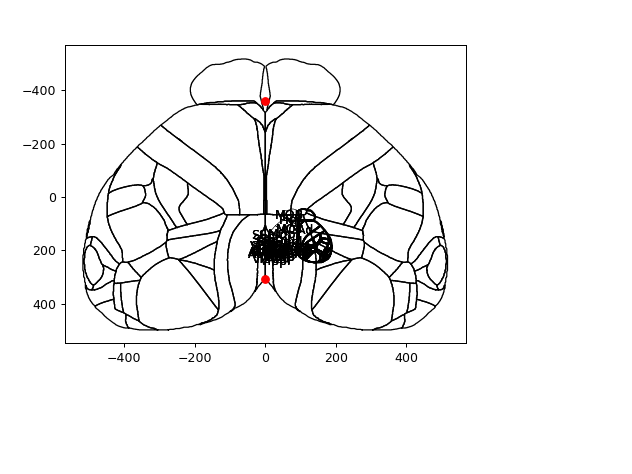

Button(description='Print Coordinates', style=ButtonStyle())

In [329]:
#get points to align 
# can skip
# Create a simple plot
fig, ax = plt.subplots()
#ax.plot(np.random.rand(10))
plt.gca().invert_yaxis()
for index, row in allen_mask.iterrows():
    right_x_coords = row['right_x']
    right_y_coords = row['right_y']
    left_x_coords = row['left_x']
    left_y_coords = row['left_y']
    left_center = row['left_center']
    plt.plot(left_x_coords,left_y_coords,color='black',  linewidth=1)
    plt.plot(right_x_coords, right_y_coords, color='black', linewidth=1)
    
src_mid = []

def on_key(event):
    # Store the coordinates of the clicked point
    if event.key == 'e':
        src_mid.append([event.xdata, event.ydata])
        # Plot the point
        ax.plot(event.xdata, event.ydata, 'ro')
        # Redraw the figure to show the new point
        fig.canvas.draw()

# Connect the click event to the onclick function
fig.canvas.mpl_connect('button_press_event', on_key)

# Add a button to print the coordinates
button = Button(description="Print Coordinates")
display(button)

def on_button_clicked(b):
    # Print the stored coordinates
    print(src_mid)
button.on_click(on_button_clicked)
#only points from one hemipshere is selected and creates a mirror
#assumes midline (where bgrema and lambda is)
#bregma is (0,0)

In [331]:
src_mid = [[0,i[1]] for i in src_mid]
src_mid.append([0,0])

<IPython.core.display.Javascript object>


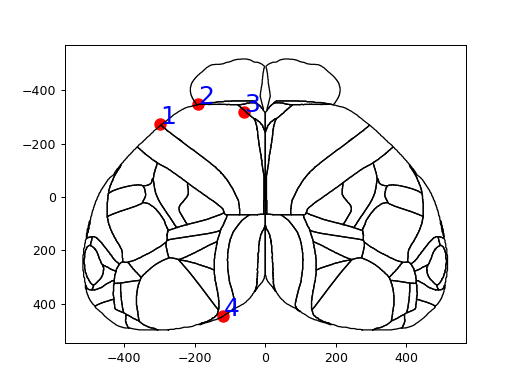

In [332]:
#selecte key points according to this order on the actual brain image
fig, ax = plt.subplots()
#ax.plot(np.random.rand(10))
plt.gca().invert_yaxis()
for index, row in allen_mask.iterrows():
    right_x_coords = row['right_x']
    right_y_coords = row['right_y']
    left_x_coords = row['left_x']
    left_y_coords = row['left_y']
    left_center = row['left_center']
    plt.plot(left_x_coords,left_y_coords,color='black',  linewidth=1)
    plt.plot(right_x_coords, right_y_coords, color='black', linewidth=1)
count=1
for i in src_left:
    plt.scatter(i[0],i[1],color='red',s=80)
    plt.text(i[0],i[1], str(count),color='blue',fontsize=20)
    count=count+1

<IPython.core.display.Javascript object>


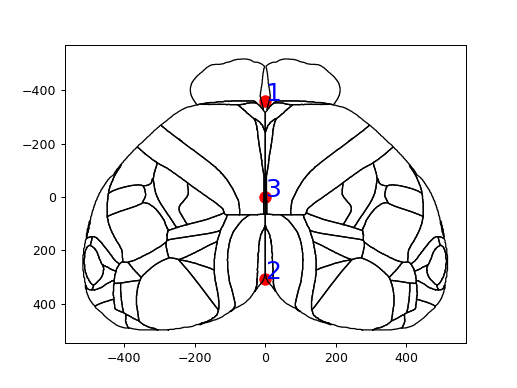

In [333]:
#selecte key points according to this order on the actual brain image
fig, ax = plt.subplots()
#ax.plot(np.random.rand(10))
plt.gca().invert_yaxis()
for index, row in allen_mask.iterrows():
    right_x_coords = row['right_x']
    right_y_coords = row['right_y']
    left_x_coords = row['left_x']
    left_y_coords = row['left_y']
    left_center = row['left_center']
    plt.plot(left_x_coords,left_y_coords,color='black',  linewidth=1)
    plt.plot(right_x_coords, right_y_coords, color='black', linewidth=1)
count=1
for i in src_mid:
    plt.scatter(i[0],i[1],color='red',s=80)
    plt.text(i[0],i[1], str(count),color='blue',fontsize=20)
    count=count+1

In [36]:
'''
src= [[-297.45762038353666, -273.28906108840124],
 [-190.13289238997027, -348.69327462550496],
 [-58.95822484227796, -316.1914584457189],
 [-118.86216707073237, 444.1012171574126],
 [297.45762038353666, -273.28906108840124],
 [190.13289238997027, -348.69327462550496],
 [58.95822484227796, -316.1914584457189],
 [118.86216707073237, 444.1012171574126],
 [0, -359.9978106204892],
 [0, 305.5386188934723],
 [0, 0]]
'''

'\nsrc= [[-297.45762038353666, -273.28906108840124],\n [-190.13289238997027, -348.69327462550496],\n [-58.95822484227796, -316.1914584457189],\n [-118.86216707073237, 444.1012171574126],\n [297.45762038353666, -273.28906108840124],\n [190.13289238997027, -348.69327462550496],\n [58.95822484227796, -316.1914584457189],\n [118.86216707073237, 444.1012171574126],\n [0, -359.9978106204892],\n [0, 305.5386188934723],\n [0, 0]]\n'

In [8]:
# choose the left hemisphere
fig, ax = plt.subplots()
ax.imshow(np.max(gcamp_raw,axis=(0)))
dst_left = []
def onclick(event):
    # Store the coordinates of the clicked point
    if event.key == 'e':
        dst_left.append([event.xdata, event.ydata])
        # Plot the point
        ax.plot(event.xdata, event.ydata, 'ro')
        # Redraw the figure to show the new point
        fig.canvas.draw()

# Connect the click event to the onclick function
fig.canvas.mpl_connect('button_press_event', onclick)

# Add a button to print the coordinates
button = Button(description="Print Coordinates")
display(button)

def on_button_clicked(b):
    # Print the stored coordinates
    print(dst_left)
button.on_click(on_button_clicked)


<IPython.core.display.Javascript object>

Button(description='Print Coordinates', style=ButtonStyle())

In [46]:
midline= 93
dst_right = [[midline*2-i[0],i[1]] for i in dst_left]

<IPython.core.display.Javascript object>


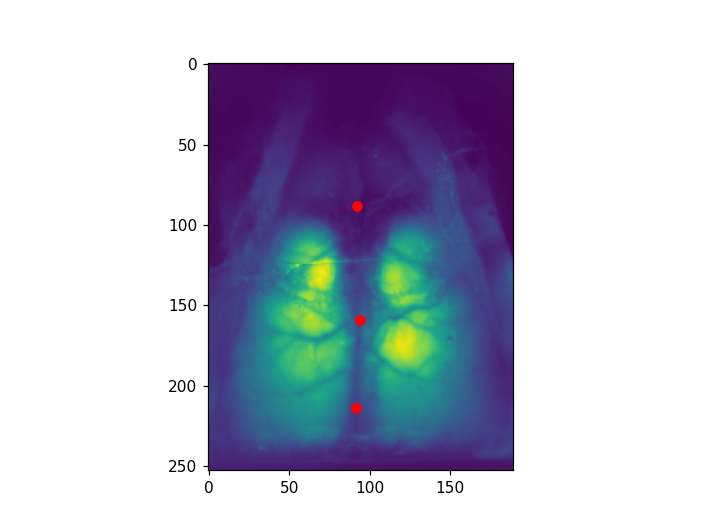

Button(description='Print Coordinates', style=ButtonStyle())

In [47]:
# choose the left hemisphere
fig, ax = plt.subplots()
ax.imshow(np.max(gcamp_raw,axis=(0)))
dst_mid = []
def onclick(event):
    # Store the coordinates of the clicked point
    if event.key == 'e':
        dst_mid.append([event.xdata, event.ydata])
        # Plot the point
        ax.plot(event.xdata, event.ydata, 'ro')
        # Redraw the figure to show the new point
        fig.canvas.draw()

# Connect the click event to the onclick function
fig.canvas.mpl_connect('button_press_event', onclick)

# Add a button to print the coordinates
button = Button(description="Print Coordinates")
display(button)

def on_button_clicked(b):
    # Print the stored coordinates
    print(dst_mid)
button.on_click(on_button_clicked)

In [48]:
dst_mid = [[midline, i[1]] for i in dst_mid]

In [50]:
dst = dst_left+dst_right+dst_mid

<IPython.core.display.Javascript object>


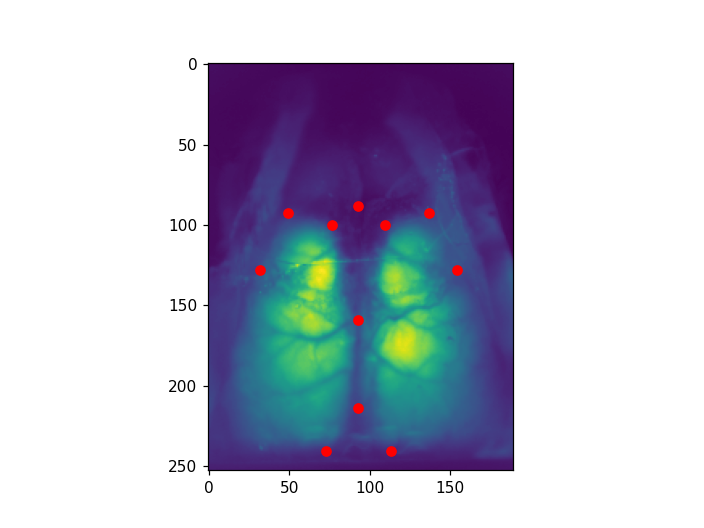

In [51]:
#sanity check
x_values = [coord[0] for coord in dst]
y_values = [coord[1] for coord in dst]
fig = plt.figure()
# Create a scatter plot
plt.scatter(x_values, y_values,color='red')
#plt.ylim(0,190)
#plt.xlim(0,253)
plt.imshow(gcamp_raw[100])

In [340]:
src=src_left+src_right+src_mid

In [55]:
#transforms the points
tform = transform.estimate_transform('projective',np.array(src),np.array(dst))
def transform_coordinates_list(coords_list, tform):
    coords_array = np.array(coords_list)
    #print('old',np.min(coords_array))
    transformed_array = tform(coords_array)
    #print('new',np.min(transformed_array))
    return transformed_array[:, 0].tolist(), transformed_array[:, 1].tolist()
def transform_single_coordinate(coord, tform):
    #print('old',np.min(coord))
    transformed = tform([coord])
    #print('new',np.min(transformed))
    return transformed[0]
allen_mask['left_x'], allen_mask['left_y'] = zip(*allen_mask.apply(lambda row: transform_coordinates_list(list(zip(row['left_x'], row['left_y'])), tform), axis=1))
allen_mask['right_x'], allen_mask['right_y'] = zip(*allen_mask.apply(lambda row: transform_coordinates_list(list(zip(row['right_x'], row['right_y'])), tform), axis=1))
allen_mask['left_center'] = allen_mask['left_center'].apply(lambda coord: transform_single_coordinate(coord, tform))
allen_mask['right_center'] = allen_mask['right_center'].apply(lambda coord: transform_single_coordinate(coord, tform))

<IPython.core.display.Javascript object>


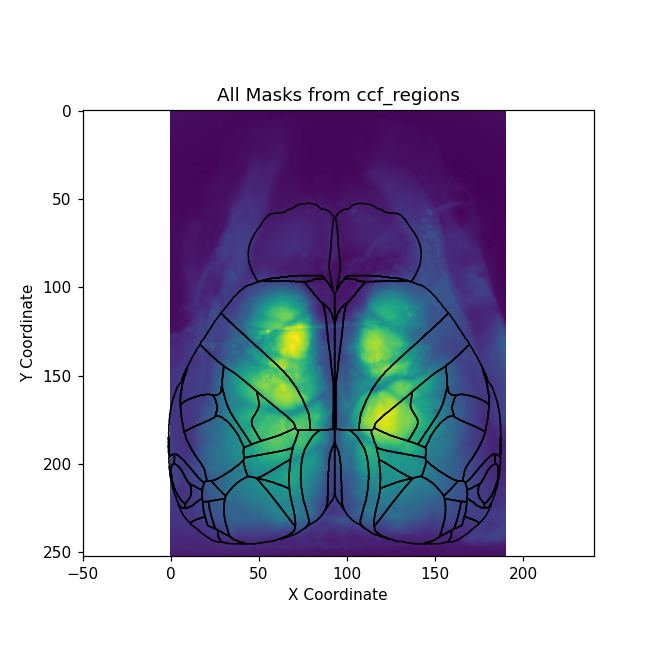

(-50.0, 240.0)

In [56]:
#sanity check
plt.figure(figsize=(6,6))
# Iterate over each row in the DataFrame
for index, row in allen_mask.iterrows():
    right_x_coords = row['right_x']
    right_y_coords = row['right_y']
    left_x_coords = row['left_x']
    left_y_coords = row['left_y']
    left_center = row['left_center']
    # Convert RGB triplet to a format suitable for matplotlib
    #color = tuple(val/255 for val in row['allen_rgb'])
    # Plot the contour and fill it
    plt.plot(left_x_coords,left_y_coords,color='black',  linewidth=1)
    plt.plot(right_x_coords, right_y_coords, color='black', linewidth=1)
    #plt.fill(x_coords, y_coords, color=color, alpha=0.3)
plt.title('All Masks from ccf_regions')
plt.xlabel('X Coordinate')
#plt.xlim(0,300) 
plt.ylabel('Y Coordinate')
#plt.ylim(0,300)
plt.imshow(gcamp_raw[100])
plt.xlim(-50,240)

<IPython.core.display.Javascript object>


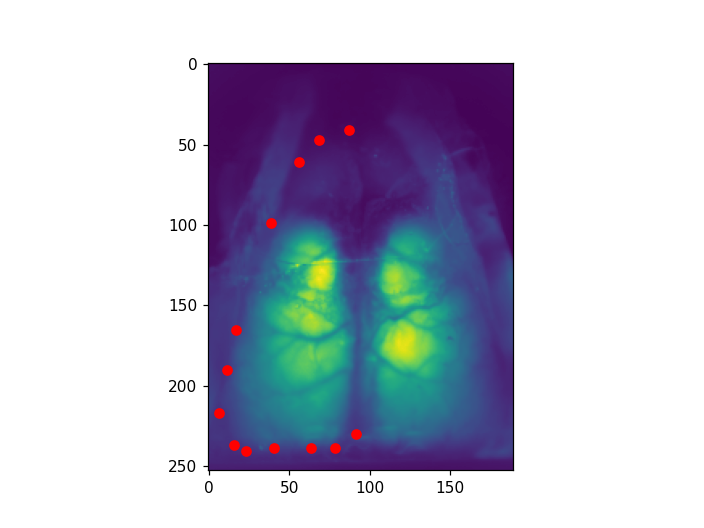

Button(description='Print Coordinates', style=ButtonStyle())

In [61]:
#draw brain mask
#first point midline, low
#second point midline, highest
fig, ax = plt.subplots()
ax.imshow(np.max(gcamp_raw,axis=(0)))

brain_msk = []

def onclick(event):
    # Store the coordinates of the clicked point
    if event.key == 'e':
        brain_msk.append([event.xdata, event.ydata])
        # Plot the point
        ax.plot(event.xdata, event.ydata, 'ro')
        # Redraw the figure to show the new point
        fig.canvas.draw()

# Connect the click event to the onclick function
fig.canvas.mpl_connect('button_press_event', onclick)

# Add a button to print the coordinates
button = Button(description="Print Coordinates")
display(button)

def on_button_clicked(b):
    # Print the stored coordinates
    print(brain_msk)

button.on_click(on_button_clicked)

In [62]:
#fix first and last point to be on midline
brain_msk[0][0]=95
brain_msk[-1][0]=95
mirror_points =  [[190-x, y] for x, y in brain_msk[1:-1]][::-1]
brain_msk_f = brain_msk+mirror_points

<IPython.core.display.Javascript object>


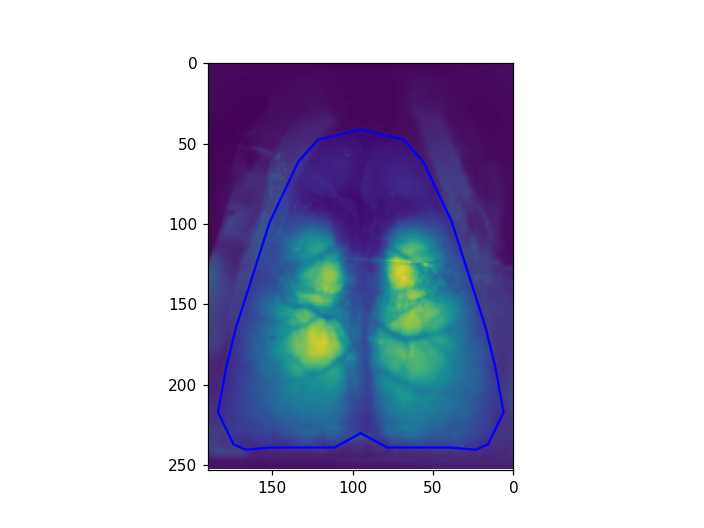

In [63]:
x, y = zip(*brain_msk_f)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the contour (polygon) using the points
ax.plot(x + (x[0],), y + (y[0],), 'b-')  # Add the first point at the end to close the contour

# Optionally, fill the contour
ax.fill(x, y, 'b', alpha=0.1)  # 'b' is the color blue, and alpha is the transparency
ax.imshow(np.max(gcamp_raw,axis=(0)))
# Set the axis limits to the bounds of the points
ax.set_xlim(190,0)
ax.set_ylim(253,0)

# Display the plot
plt.show()


In [29]:
from shapely.geometry import Point, Polygon
brain_contour = Polygon(brain_msk_f)

In [64]:
allen_mask2 = allen_mask.copy()
from shapely.geometry import Point, Polygon
brain_contour = Polygon(brain_msk_f)
def filter_points_inside_contour(x_list, y_list, contour):
    inside_points = [(x, y) for x, y in zip(x_list, y_list) if Point(x, y).within(contour)]
    return zip(*inside_points) if inside_points else ([], [])

# Perform the point-in-polygon test and update the DataFrame
for col_x, col_y in [('left_x', 'left_y'), ('right_x', 'right_y')]:
    allen_mask2[col_x], allen_mask2[col_y] = zip(*allen_mask2.apply(lambda row: filter_points_inside_contour(row[col_x], row[col_y], brain_contour), axis=1))

def close_mask_and_update_center(x_list, y_list):
    x_list = list(x_list)  # Convert tuple to list
    y_list = list(y_list)  # Convert tuple to list
    if len(x_list) > 0 and (x_list[0], y_list[0]) != (x_list[-1], y_list[-1]):
        x_list.append(x_list[0])
        y_list.append(y_list[0])
    if len(x_list) > 2:  # At least 3 points are needed to form a polygon
        mask_polygon = Polygon(zip(x_list, y_list))
        center = mask_polygon.centroid.coords[0]
    else:
        center = (None, None)
    return x_list, y_list, center

for col_x, col_y in [('left_x', 'left_y'), ('right_x', 'right_y')]:
    results = allen_mask2.apply(lambda row: close_mask_and_update_center(row[col_x], row[col_y]), axis=1)
    allen_mask2[col_x], allen_mask2[col_y], centers = zip(*results)
    center_col = 'left_center' if col_x == 'left_x' else 'right_center'
    allen_mask2[center_col] = centers


<IPython.core.display.Javascript object>


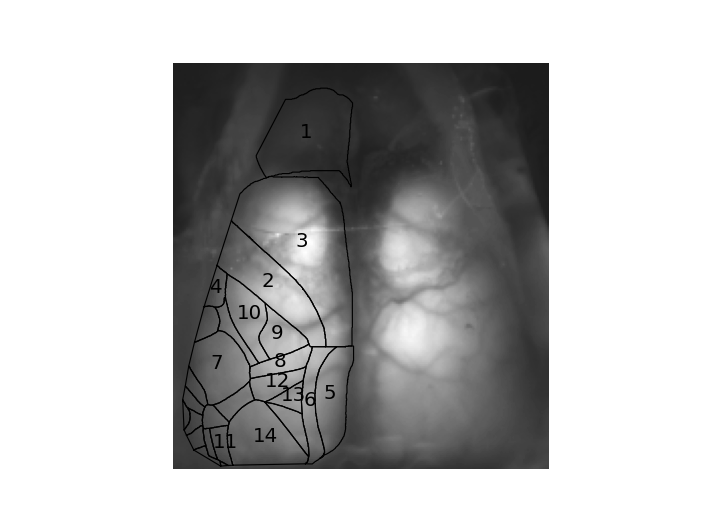

In [65]:
fig, ax = plt.subplots()
#ax.plot(np.random.rand(10))
plt.gca().invert_yaxis()
exclude = ['FRP','PL','RSPv','ACAd']
count=1
ncount=1
for index, row in allen_mask2.iterrows():
    if row['acronym'] not in exclude:
        right_x_coords = row['right_x']
        right_y_coords = row['right_y']
        left_x_coords = row['left_x']
        left_y_coords = row['left_y']
        left_center = row['left_center']
        note = row['acronym']
        # Convert RGB triplet to a format suitable for matplotlib
        #color = tuple(val/255 for val in row['allen_rgb'])
        # Plot the contour and fill it
        #plt.plot(left_x_coords,left_y_coords,color='red',  linewidth=1)
        if count in [9,24,23,16,17,18,14,20,21,4,6,15,19]:
            plt.plot(left_x_coords, left_y_coords, color='black', linewidth=0.75)
        else:
            plt.plot(left_x_coords, left_y_coords, color='black', linewidth=0.75,label=f'{ncount}:{note}')
        
        if left_center[0] is not None:
            if count not in [9,24,23,16,17,18,14,20,21,4,6,15,19]:
                plt.text(int(left_center[0])-4,int(left_center[1])+2,ncount,color='black',fontsize=13)
                ncount+=1
            count+=1

    #if left_center[0] is not None:
    #    plt.text(int(left_center[0]),int(left_center[1]),note,color='blue')
    #print(note,left_center[0],left_center[1])
'''
for index, row in allen_mask.iterrows():
    right_x_coords = row['right_x']
    right_y_coords = row['right_y']
    left_x_coords = row['left_x']
    left_y_coords = row['left_y']
    left_center = row['left_center']
    plt.plot(left_x_coords,left_y_coords,color='black',  linewidth=1)
    plt.plot(right_x_coords, right_y_coords, color='black', linewidth=1)
'''
plt.imshow(gcamp_raw[100][:242,:],cmap='gray',alpha =0.9)
plt.xlim(3,190)
plt.ylim(242,40)
plt.axis('off')
plt.savefig('fov_overbrain.svg')

<IPython.core.display.Javascript object>


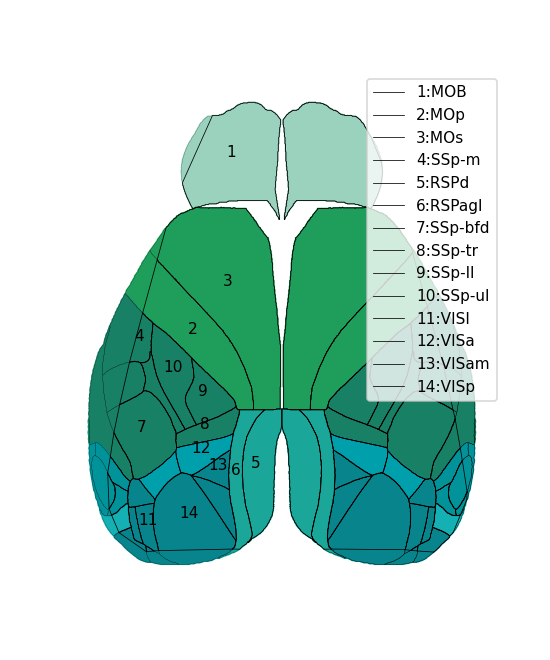

(-11.008549974009053, 197.0085499740091, 254.99667886537284, 42.6757176764787)

In [66]:
from matplotlib.legend_handler import HandlerBase

fig, ax = plt.subplots(figsize=(5,6))
#ax.plot(np.random.rand(10))
plt.gca().invert_yaxis()
exclude = ['FRP','PL','RSPv','ACAd']
count=1
ncount=1

class TextHandler(HandlerBase):
    def create_artists(self, legend, text ,xdescent, ydescent,
                        width, height, fontsize, trans):
        tx = plt.text(width/2.,height/2, text, fontsize=fontsize,
                      ha="center", va="center", fontweight="bold")
        return [tx]

for index, row in allen_mask2.iterrows():
    if row['acronym'] not in exclude :
        right_x_coords = row['right_x']
        right_y_coords = row['right_y']
        left_x_coords = row['left_x']
        left_y_coords = row['left_y']
        left_center = row['left_center']
        # Convert RGB triplet to a format suitable for matplotlib
        #color = tuple(val/255 for val in row['allen_rgb'])
        # Plot the contour and fill it
        note = row['acronym']
        plt.plot(right_x_coords,right_y_coords,color='black',  linewidth=0.5)
        if count in [9,24,23,16,17,18,14,20,21,4,6,15,19]:
            plt.plot(left_x_coords, left_y_coords, color='black', linewidth=0.5)
        else:
            plt.plot(left_x_coords, left_y_coords, color='black', linewidth=0.5,label=f'{ncount}:{note}')
        
        if left_center[0] is not None:
            if count not in [9,24,23,16,17,18,14,20,21,4,6,15,19]:
                plt.text(int(left_center[0])-4,int(left_center[1]),ncount,color='black')
                ncount+=1
            count+=1
        #print(note,left_center[0],left_center[1])
plt.legend(handler_map={str: TextHandler()},bbox_to_anchor=(0.7, 1), loc='upper left', borderaxespad=0.)

for index, row in allen_mask.iterrows():
    if row['acronym'] not in exclude :
        right_x_coords = row['right_x']
        right_y_coords = row['right_y']
        left_x_coords = row['left_x']
        left_y_coords = row['left_y']
        left_center = row['left_center']
        color = eval(row['allen_rgb'])
        plt.plot(left_x_coords,left_y_coords,color='black',  linewidth=0.1)
        plt.fill(left_x_coords,left_y_coords, color = np.array(color)/255)
        plt.fill(right_x_coords,right_y_coords, color = np.array(color)/255)
        plt.plot(right_x_coords, right_y_coords, color='black', linewidth=0.21)
        count+=1
plt.axis('off')
#plt.savefig('fov_allen_mask.svg')

In [67]:
allen_mask2.to_csv('/mnt/team/TM_Lab/Tony/water_reaching/Data/rig1_data/processed/FRM1_2023-07-07_1/mask.csv')

In [81]:
# create and save mask
image_shape = (253, 190)  # Replace with your image dimensions
mask = np.zeros(image_shape, dtype=np.uint8)
exclude = ['FRP','PL','RSPv','ACAd']
for index, row in allen_mask2.iterrows():
    # Get the coordinates for the left and right contours
    if row['acronym'] not in exclude:
        left_x_coords = row['left_x']
        left_y_coords = row['left_y']
        right_x_coords = row['right_x']
        right_y_coords = row['right_y']

        if len(left_x_coords) > 0 and len(left_y_coords) > 0:
            rr, cc = polygon(left_y_coords, left_x_coords)
            mask[rr, cc] = 1  # Set the pixels inside the contour to 1

        # Draw the right contour if it's not empty
        if len(right_x_coords) > 0 and len(right_y_coords) > 0:
            rr, cc = polygon(right_y_coords, right_x_coords)
            mask[rr, cc] = 1  # Set the pixels inside the contour to 1
# Display the mask
plt.imshow(mask, cmap='gray')

In [83]:
from skimage.draw import polygon, polygon_perimeter


<IPython.core.display.Javascript object>


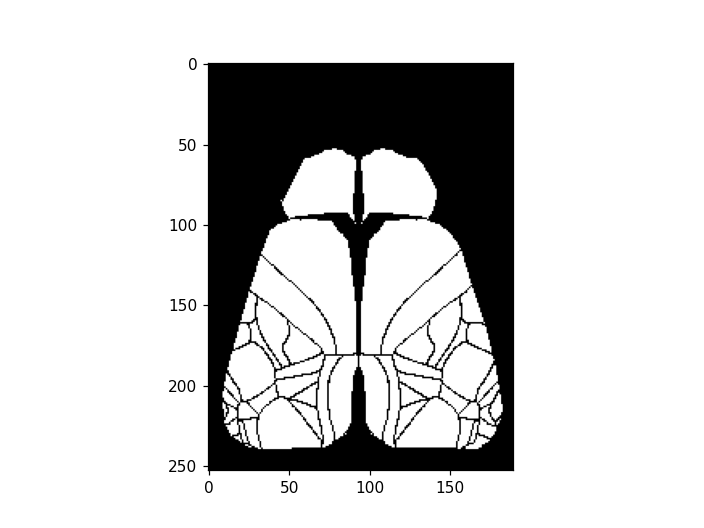

In [86]:
# create and save mask
image_shape = (253, 190)  # Replace with your image dimensions
mask = np.zeros(image_shape, dtype=np.uint8)
exclude = ['FRP','PL','RSPv','ACAd']
for index, row in allen_mask2.iterrows():
    # Get the coordinates for the left and right contours
    if row['acronym'] not in exclude:
        left_x_coords = row['left_x']
        left_y_coords = row['left_y']
        right_x_coords = row['right_x']
        right_y_coords = row['right_y']

        if len(left_x_coords) > 0 and len(left_y_coords) > 0:
            rr, cc = polygon(left_y_coords, left_x_coords)
            mask[rr, cc] = 1  # Set the pixels inside the contour to 1
            rr, cc = polygon_perimeter(left_y_coords, left_x_coords)
            mask[rr, cc] = 0

        # Draw the right contour if it's not empty
        if len(right_x_coords) > 0 and len(right_y_coords) > 0:
            rr, cc = polygon(right_y_coords, right_x_coords)
            mask[rr, cc] = 1  # Set the pixels inside the contour to 1
            rr, cc = polygon_perimeter(right_y_coords, right_x_coords)
            mask[rr, cc] = 0
# Display the mask
plt.imshow(mask, cmap='gray')

<IPython.core.display.Javascript object>


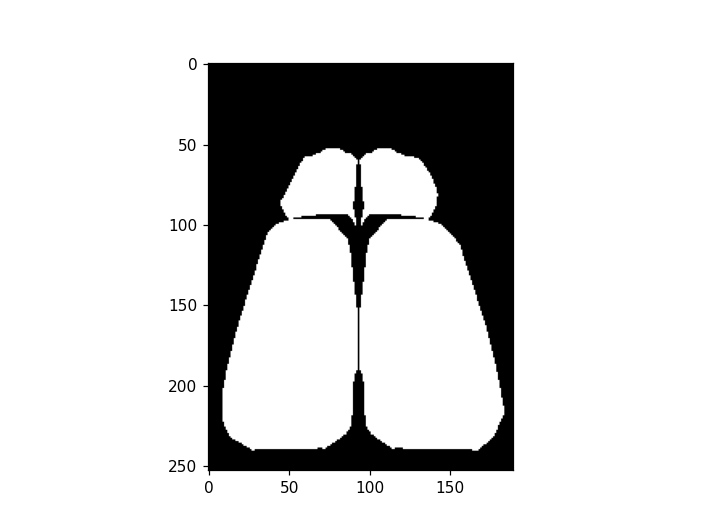

In [80]:
plt.imshow(mask)

In [69]:
cv2.imwrite('/mnt/team/TM_Lab/Tony/water_reaching/Data/rig1_data/processed/FRM1_2023-07-07_1/mask.png',mask)

True

In [ ]:
#image process

In [ ]:
import os
import cupy as cp
import numpy as np
import tifffile
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2
from tqdm import tqdm
from scipy.signal import cheby1, filtfilt
import pandas as pd
from sklearn.decomposition import PCA
import ast
from skimage.transform import estimate_transform, warp_coords
from cupyx.scipy.ndimage import gaussian_filter
from skimage.draw import polygon, polygon_perimeter

#rig1 20.95 pixels/ mm


def get_trial_folder_path(base_path, trial_number):
    """
    Returns the folder path for the given trial number.
    
    Parameters:
    - base_path: The path where the trial folders are located.
    - trial_number: The trial number you're looking for.
    
    Returns:
    - The full path to the trial folder, or None if not found.
    """
    
    # Generate possible folder names
    possible_names = [f"trial_{trial_number}", f"Trial_{trial_number}"]
    
    # Check each possible name
    for name in possible_names:
        folder_path = os.path.join(base_path, name)
        if os.path.exists(folder_path):
            return folder_path
    
    # If none of the names exist, return None
    return None

def apply_temporal_filter(image_stack, low_freq, high_freq, sampling_rate):
    # Calculate Nyquist frequency
    nyquist = 0.5 * sampling_rate
    
    # Normalize frequencies by Nyquist frequency
    low = low_freq / nyquist
    high = high_freq / nyquist
    # Design Chebyshev type I bandpass filter
    b, a = cheby1(N=4, rp=1, Wn=[low, high], btype='band')
    
    # Apply the filter to each pixel's time series
    filtered_stack = np.empty_like(image_stack)
    for i in range(image_stack.shape[1]):
        for j in range(image_stack.shape[2]):
            pixel_time_series = image_stack[:, i, j]
            
            # Check for np.nan in the pixel's time series
            if not np.any(np.isnan(pixel_time_series)):
                filtered_stack[:, i, j] = filtfilt(b, a, pixel_time_series)
            else:
                filtered_stack[:, i, j] = pixel_time_series  # retain original if there's any np.nan
    
    return filtered_stack

def pca_noise_clear(gcamp, var_explained=0.85):
    stk = np.reshape(gcamp,(gcamp.shape[0],gcamp.shape[1]*gcamp.shape[2]))
    pca = PCA()
    pca.fit(stk)
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    ind=np.where(cumulative_variance_ratio >= var_explained)[0][0]
    components = pca.transform(stk)
    n_components = ind # choose the number of principal components to keep
    keep_components = np.arange(n_components)
    components_new = np.zeros_like(components)
    components_new[:, keep_components] = components[:, keep_components]
    
    # Reconstruct the compressed image using the inverse transform of the PCA model.
    img_reconstructed = pca.inverse_transform(components_new)
    img_compressed = img_reconstructed.reshape(gcamp.shape)
    return img_compressed



sigma = 3.0


In [ ]:
#load and process data
tif_path = '/mnt/team/TM_Lab/Tony/water_reaching/Data/rig1_data/processed/FRM1_2023-07-07_1/trial_0/brain/gcamp.tif'
gcamp = tifffile.imread(tif_path)
#gcamp = pca_noise_clear(gcamp) # PCA denoise
filtered_image_stack = apply_temporal_filter(gcamp, 0.1,3, 36)
for i in range(filtered_image_stack.shape[0]):
    filtered_image_stack[i]=gaussian_filter(cp.array(filtered_image_stack[i]), sigma).get()

In [ ]:
#apply mask
image_shape = (253, 190)  # Replace with your image dimensions
mask = np.zeros(image_shape, dtype=np.uint8)
exclude = ['FRP','PL','RSPv','ACAd']
for index, row in allen_mask2.iterrows():
    # Get the coordinates for the left and right contours
    if row['acronym'] not in exclude:
        left_x_coords = row['left_x']
        left_y_coords = row['left_y']
        right_x_coords = row['right_x']
        right_y_coords = row['right_y']

        if len(left_x_coords) > 0 and len(left_y_coords) > 0:
            rr, cc = polygon(left_y_coords, left_x_coords)
            mask[rr, cc] = 1  # Set the pixels inside the contour to 1
            rr, cc = polygon_perimeter(left_y_coords, left_x_coords) # plot contours within brain 
            mask[rr, cc] = 0

        # Draw the right contour if it's not empty
        if len(right_x_coords) > 0 and len(right_y_coords) > 0:
            rr, cc = polygon(right_y_coords, right_x_coords)
            mask[rr, cc] = 1  # Set the pixels inside the contour to 1
            rr, cc = polygon_perimeter(right_y_coords, right_x_coords)# plot contours within brain 
            mask[rr, cc] = 0

filtered_image_stack [:, ~(mask>0)] = np.nan # final data